In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
!pip install split_folders

In [100]:
import splitfolders

# Path to the dataset folder
input_folder = 'PlatVillage'  # Replace with the actual path to your dataset

# Path to the output folder
output_folder = 'dataset'  # Replace with the desired output path

# Split with a ratio
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.7, .1, .2)) 
# (.8, .1, .1) means 80% for training, 10% for validation, and 10% for testing


Copying files: 2152 files [00:02, 907.80 files/s]


In [101]:
import os
save_to_dir = 'Augmenteddirectory'
if not os.path.exists(save_to_dir):
    os.makedirs(save_to_dir)

In [103]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip = True,
    rotation_range = 10
)


train_generator  = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 1506 images belonging to 3 classes.


In [104]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip = True,
    rotation_range = 10
)


validation_generator  = train_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 215 images belonging to 3 classes.


In [105]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip = True,
    rotation_range = 10
)


test_generator  = train_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 431 images belonging to 3 classes.


In [118]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\parik\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [119]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [121]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 866ms/step - accuracy: 0.4966 - loss: 0.9101 - val_accuracy: 0.4635 - val_loss: 0.8773
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.9265 - val_accuracy: 0.4783 - val_loss: 0.8148
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 812ms/step - accuracy: 0.5356 - loss: 0.8366 - val_accuracy: 0.7031 - val_loss: 0.6997
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5625 - loss: 0.7442 - val_accuracy: 0.6957 - val_loss: 0.6160
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 800ms/step - accuracy: 0.7034 - loss: 0.6441 - val_accuracy: 0.7552 - val_loss: 0.5742
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8750 - loss: 0.3669 - val_accuracy: 0.6957 - val_loss: 0.7352
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 777ms/step - accuracy: 0.8098 - loss: 0.4843 - val_accuracy: 0.8542 - val_loss: 0.3480
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.1915 - val_accuracy: 0.9130

In [122]:
scores  = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 575ms/step - accuracy: 0.8567 - loss: 0.4025


In [123]:
class_names = dataset.class_names

first image to predict
actual label : Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
predicted label : Potato___Early_blight


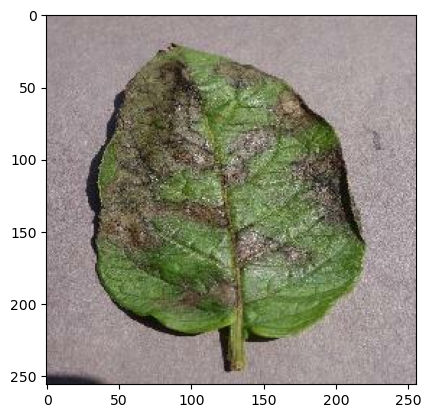

In [124]:
import numpy as np

for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label :', class_names[first_label])

    batch_predict = model.predict(image_batch)
    print('predicted label :',class_names[np.argmax(batch_predict[0])])

In [125]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


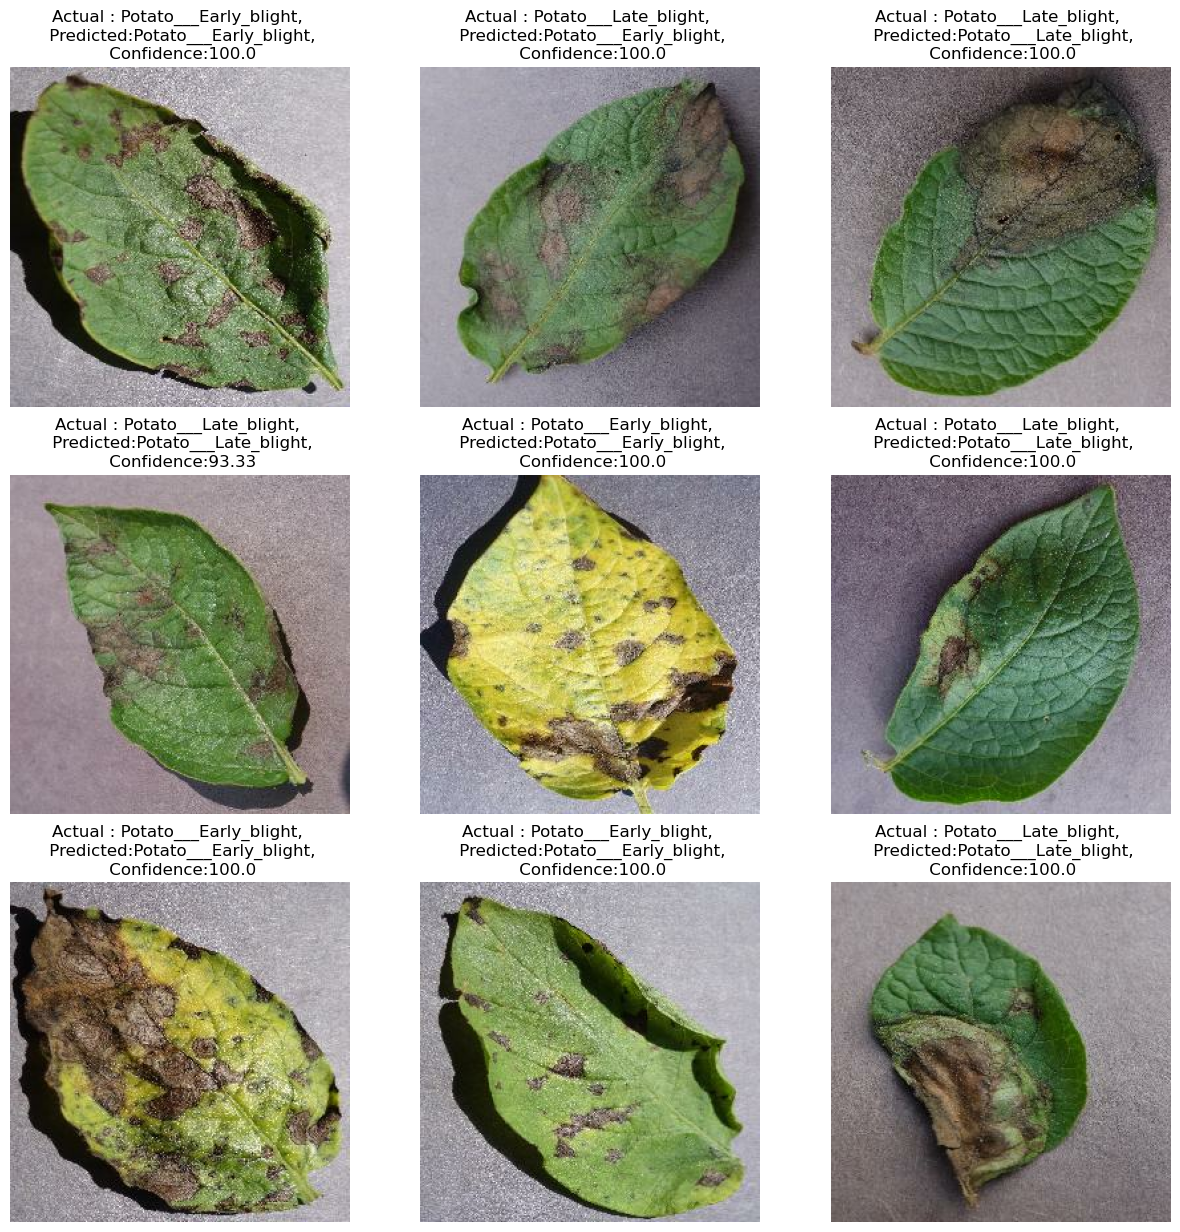

In [126]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class}, \n Predicted:{predicted_class},\n Confidence:{confidence}")
        plt.axis('off')

In [127]:
model.save("../potatoes.h5")

In [128]:
model.save("../potatoes.keras")